# $\color{blue}{\text{NLP introduction 4 GIS}}$   

* prof. dr Ranka Stanković, University of Belgrade, Faculty of Mining and Geology, ranka@rgf.rs

* PhD  winter class : Big data and artificial intelligence supporting climate and water science, Earth and Life Institute of UCLouvain, Louvain-la-Neuve, 27.1.2025. 9h-10:30h https://sites.google.com/view/envitam/upcoming-events/big-data-and-water-management  

## Prepare environement

In [1]:
# install required libraries
!pip install spacy geograpy3 geopandas folium
!pip install transformers

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# run the spacy module with the subcommand `download en_core_web_sm` and install spaCy's small English language model
# enabling NLP features (such as tokenization, lemmatization, named entity recognition, etc.) for English text.
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# import NLTK library and then download resource packages:
# punkt_tab – Provides tokenization of text into sentences or words (Punkt tokenizer tables).
# averaged_perceptron_tagger_eng – Supplies the averaged perceptron model for part-of-speech tagging in English.
# maxent_ne_chunker_tab – Offers tables for the maximum entropy chunker, used for named entity recognition.
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

## Step 1: $\color{blue}{\text{Acquire or Prepare Text Data}}$   
Let’s assume we have a collection of news articles or social media posts that mention various places.



In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

text_example = "I traveled from Paris to Berlin and then visited Paris in Texas."

doc = nlp(text_example)

for ent in doc.ents:
    print(ent.text, ent.label_)

Paris GPE
Berlin GPE
Paris GPE
Texas GPE


In [5]:
!pip install lxml_html_clean

Example can be also in form, a CSV file with columns: [id, date, text].

## Step 2:   $\color{blue}{\text{Extract Toponyms and Disambiguate}}$  
Here you can:

* Identify location mentions via Named Entity Recognition (NER).

* Use a geocoding or geoparsing service to get coordinates for each location mention.


Example with geograpy3:

In [6]:
import geograpy

text_example = "I traveled from Paris to Berlin and then visited Paris in Texas."

places = geograpy.get_geoPlace_context(text=text_example)
print("Country Mentions:", places.countries)
print("Region Mentions:", places.regions)
print("City Mentions:", places.cities)

Unzipping /root/.geograpy3/locations.db from /root/.geograpy3/locations.db.gz
Extracting completed
Country Mentions: ['France', 'United States of America', 'Canada', 'Australia', 'Sweden', 'Germany', 'Denmark', "People's Republic of China", 'Indonesia']
Region Mentions: []
City Mentions: ['Paris', 'Texas']


Then, geograpy tries to map them to real world locations using the Geonames database.

* Alternatively, you can loop over the recognized place names from spaCy and call an external geocoding API (e.g., OpenStreetMap, Google, ArcGIS, etc.) to get lat/lon.

* Using a geocoding service (Nominatim example):

In [7]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_nlp_gis_app")

locations = ["Paris", "Berlin", "Paris Texas"]
for loc in locations:
    result = geolocator.geocode(loc)
    if result:
        print(loc, "->", result.latitude, result.longitude, result.address)

Paris -> 48.8588897 2.3200410217200766 Paris, France métropolitaine, France
Berlin -> 52.510885 13.3989367 Berlin, Deutschland
Paris Texas -> 47.4867563 19.0637436 Paris, Texas, 22, Ráday utca, Belső-Ferencváros, IX. kerület, Budapest, Közép-Magyarország, 1092, Magyarország


Notice that you might get multiple matches for “Paris” and need to refine your query or handle ambiguous results.
## Step 3:  $\color{blue}{\text{ Create a GeoDataFrame and Visualize}}$  
Once you have (location_name, latitude, longitude) tuples, you can put them into a GeoDataFrame using GeoPandas.

In [8]:
import geopandas as gpd
from shapely.geometry import Point

data = [
    {"location": "Paris, France", "lat": 48.8566, "lon": 2.3522},
    {"location": "Berlin, Germany", "lat": 52.5200, "lon": 13.4050},
    {"location": "Paris, Texas", "lat": 33.6609, "lon": -95.5555},
]

gdf = gpd.GeoDataFrame(
    data,
    geometry=[Point(row["lon"], row["lat"]) for row in data],
    crs="EPSG:4326"  # WGS84
)

print(gdf)

          location      lat      lon                  geometry
0    Paris, France  48.8566   2.3522    POINT (2.3522 48.8566)
1  Berlin, Germany  52.5200  13.4050      POINT (13.405 52.52)
2     Paris, Texas  33.6609 -95.5555  POINT (-95.5555 33.6609)


<Axes: >

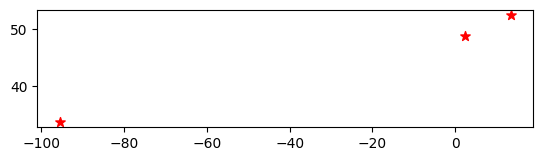

In [9]:
gdf.plot(marker='*', color='red', markersize=50)

In [10]:
gdf.to_file("locations.geojson", driver="GeoJSON")
# load to QGIS ...

## Step 4: (Optional)  $\color{blue}{\text{ Map Visualization in Jupyter with Folium}}$

In [ ]:
import folium

m = folium.Map(location=[20, 0], zoom_start=2)  # a rough 'global' view

for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=row["location"]
    ).add_to(m)

m